# Jonathan Halverson
# Friday, January 5, 2017
# Aside on FFT applied to temperature data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('halverson')

The records consist of the mean temperature in Boston for each week over a 30-week period (n_steps). The target is the mean temperature the week after the window or the 31st week. Our training data are intervals taken over a 5 year period or 261 weeks.

In [2]:
bos_wthr = pd.read_csv('../project_boston_restaurants/data/boston_weather_2015_2011.csv', parse_dates=['EST'])
bos_wthr.head(3).transpose()

,0,1,2
EST,2015-01-01 00:00:00,2015-01-02 00:00:00,2015-01-03 00:00:00
Max TemperatureF,33,41,37
Mean TemperatureF,28,36,30
Min TemperatureF,22,31,22
Max Dew PointF,16,17,36
MeanDew PointF,8,15,20
Min DewpointF,5,11,8
Max Humidity,53,53,100
Mean Humidity,43,45,72
Min Humidity,32,37,43


Remove the last row to make an odd number of points:

In [3]:
bos_wthr = bos_wthr[:-1]
bos_wthr.shape

(1825, 23)

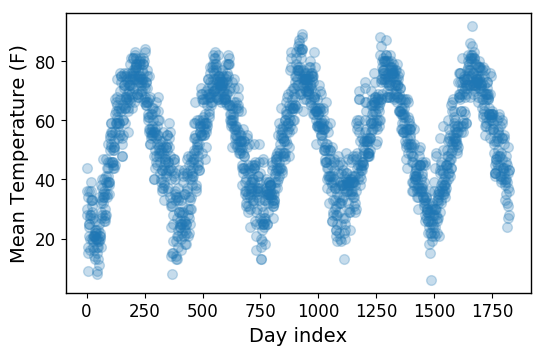

In [4]:
plt.scatter(bos_wthr.index, bos_wthr['Mean TemperatureF'], alpha=0.25)
plt.xlabel('Day index')
plt.ylabel('Mean Temperature (F)')

Let's create a simple ML regression model to predict temperature the next week based on the mean temperature the previous n weeks.

In [5]:
N = bos_wthr['Mean TemperatureF'].index.values.size
freq = np.fft.fftfreq(N, d=1.0)
Hn = np.fft.fft(bos_wthr['Mean TemperatureF'])

fftfreq stores the frequencies associated with the DFT of the original signal. Note that the zero frequency is included (DC offset, the cosine of 0 is 1). Both positive and negative frequencies are stored.

In [6]:
freq

array([ 0.        ,  0.00054795,  0.00109589, ..., -0.00164384,
       -0.00109589, -0.00054795])

In [7]:
Hn

array([  9.64070000e+04  +0.j        ,  -4.00031976e+02+583.0070788j ,
        -1.27279646e+02-459.36834533j, ...,  -7.02210665e+01-508.29843182j,
        -1.27279646e+02+459.36834533j,  -4.00031976e+02-583.0070788j ])

Get indices for positive frequencies:

In [8]:
ind = np.arange(1, N/2 + 1)

In [9]:
freq[ind][:10]

array([ 0.00054795,  0.00109589,  0.00164384,  0.00219178,  0.00273973,
        0.00328767,  0.00383562,  0.00438356,  0.00493151,  0.00547945])

Negative frequencies are indexed by -ind:

In [10]:
freq[-ind][:10]

array([-0.00054795, -0.00109589, -0.00164384, -0.00219178, -0.00273973,
       -0.00328767, -0.00383562, -0.00438356, -0.00493151, -0.00547945])

Compute the power spectral density:

In [11]:
psd = np.abs(Hn[ind])**2 + np.abs(Hn[-ind])**2

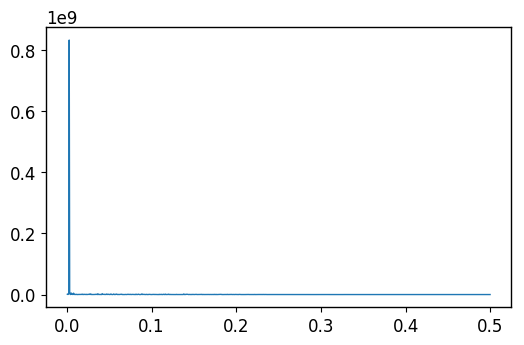

In [12]:
plt.plot(freq[ind], psd)

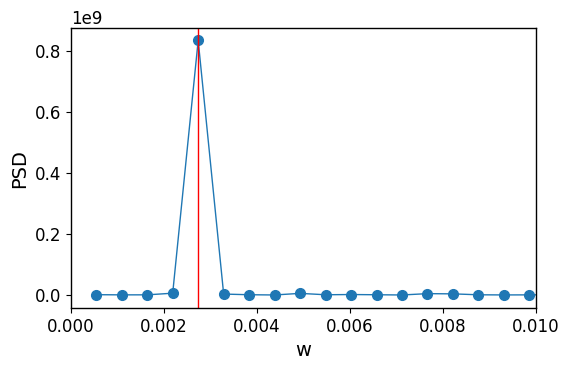

In [13]:
plt.plot(freq[ind], psd, marker='o')
plt.axvline(1 / 365.0, c='r')
plt.xlim(0.0, 0.01)
plt.xlabel('w')
plt.ylabel('PSD')

In [14]:
freq[ind][:10]

array([ 0.00054795,  0.00109589,  0.00164384,  0.00219178,  0.00273973,
        0.00328767,  0.00383562,  0.00438356,  0.00493151,  0.00547945])

In [15]:
1 / freq[ind][4]

365.0

The peak corresponds to 365 days which is indeed the period of the periodic signal.

### Continuous signal

Create a continuous function that mimics the data:

In [108]:
t = np.arange(0.0, 1824.0, step=0.1)
syn = 45.0 * (np.sin(t / 65.0) + 1.0)

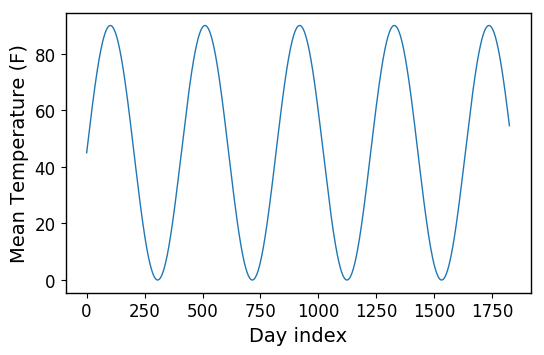

In [109]:
plt.plot(t, syn)
plt.xlabel('Day index')
plt.ylabel('Mean Temperature (F)')

/Users/jhalverson/software/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in arcsin
  from ipykernel import kernelapp as app


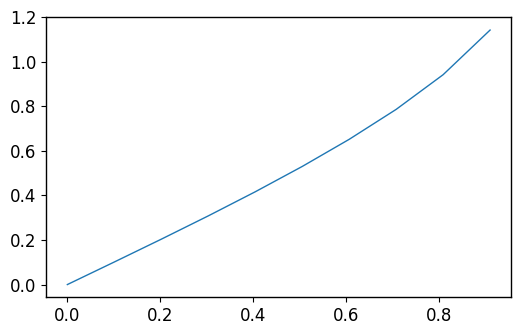

In [110]:
x = np.linspace(0.0, 10.0, 100)
plt.plot(x, np.arcsin(x))

In [111]:
t.size

18240

In [112]:
freq = np.fft.fftfreq(t.size, d=0.1)
Hn = np.fft.fft(syn)

In [113]:
ind = np.argwhere(freq > 0).flatten()

In [114]:
freq[ind][:10]

array([ 0.00054825,  0.00109649,  0.00164474,  0.00219298,  0.00274123,
        0.00328947,  0.00383772,  0.00438596,  0.00493421,  0.00548246])

In [115]:
freq[-ind][:10]

array([-0.00054825, -0.00109649, -0.00164474, -0.00219298, -0.00274123,
       -0.00328947, -0.00383772, -0.00438596, -0.00493421, -0.00548246])

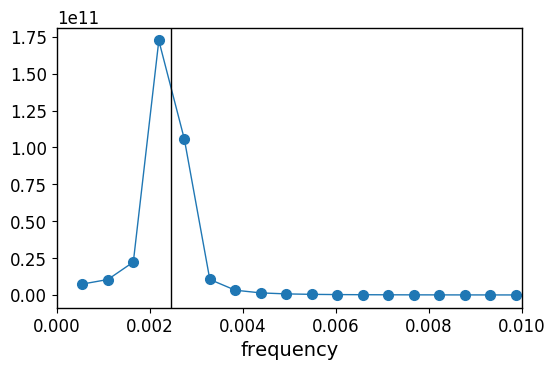

In [116]:
plt.plot(freq[ind], np.abs(Hn[ind])**2 + np.abs(Hn[-ind])**2, marker='o')
plt.axvline(1.0 / (2 * np.pi * 65.0), c='k')
plt.xlim(0, 0.01)
plt.xlabel('frequency')

### Conventional Wikipedia example

In [35]:
t = np.linspace(0, 0.5, num=500)
F = np.cos(20 * np.pi * t) + 2 * np.cos(40 * np.pi * t) + 3 * np.cos(60 * np.pi * t) + 4 * np.cos(80 * np.pi * t) + 5 * np.cos(100 * np.pi * t)

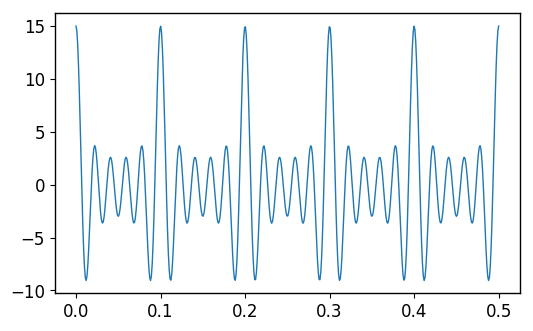

In [36]:
plt.plot(t, F)

/Users/jhalverson/software/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in divide
  if __name__ == '__main__':


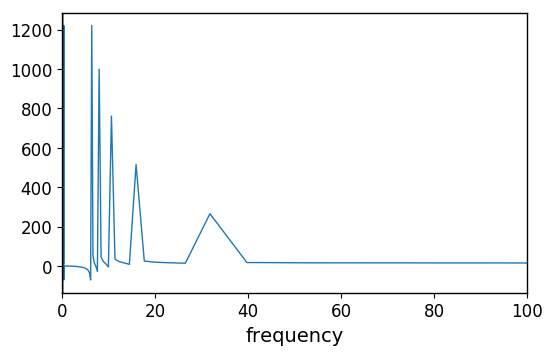

In [39]:
plt.plot(1/(2*np.pi*t), np.fft.fft(F).real)
#plt.plot(1/t, np.fft.fft(F).imag)
#plt.plot(1/t, np.abs(F))
plt.axvline(1.0 / 365.0, c='k')
plt.axvline(4.0 / 365.0, c='k')
#plt.ylim(-20000, 20000)
plt.xlim(0.0, 100)
plt.xlabel('frequency')

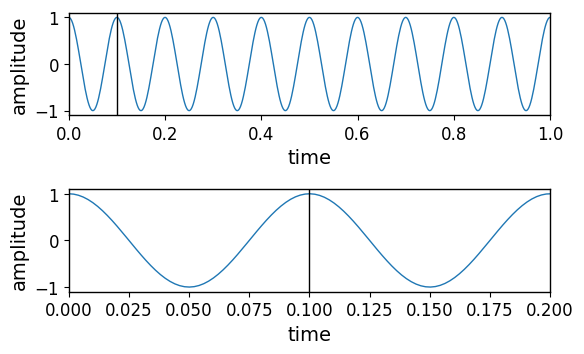

In [40]:
t_min, t_max = 0.0, 1.0
t = np.linspace(t_min, t_max, num=500)
y = np.cos(20 * np.pi * t)

plt.subplot(211)
plt.plot(t, y)
plt.xlim(0, 1.0)
plt.axvline(1.0 / 10, c='k')
plt.xlabel('time')
plt.ylabel('amplitude')

plt.subplot(212)
plt.plot(t, y)
plt.xlim(0, 0.2)
plt.axvline(1.0 / 10, c='k')
plt.xlabel('time')
plt.ylabel('amplitude')

plt.tight_layout()

The period is 0.1 so the frequency is 10.

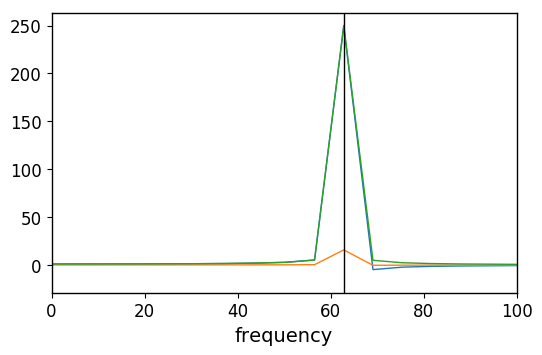

In [41]:
#plt.plot(np.arange(t.size) / (t.size * (t_max - t_min)), np.fft.fft(y).real)
#plt.plot(1/t, np.fft.fft(y).imag)
#plt.plot(1/t, np.abs(y))
w = 2.0 * np.pi * np.arange(t.size) / (t_max - t_min)
plt.plot(w, np.fft.fft(y).real)
plt.plot(w, np.fft.fft(y).imag)
plt.plot(w, np.abs(np.fft.fft(y)))

plt.axvline(20 * np.pi, c='k')
#plt.axvline(4.0 / 365.0, c='k')
#plt.ylim(-20000, 20000)
plt.xlim(0.0, 100)
plt.xlabel('frequency')

#### From Mathematical Methods for Physicists

In [42]:
bos_wthr.shape[0]

1825

In [43]:
bos_wthr.index.max()

1824

In [44]:
T = 1.0 * bos_wthr.index.max()
N = bos_wthr.shape[0] / 2 # half the total number of points
dx = pd.DataFrame({'k':range(0, 2 * N)})
dx['w'] = 2.0 * np.pi * dx.k / T
dx['t_k'] = dx.k * T / (2.0 * N)
dx['Temperature'] = 1.0 * bos_wthr['Mean TemperatureF'].copy()

In [45]:
dx.head()

,k,w,t_k,Temperature
0,0,0.000000,0.0,28.0
1,1,0.003445,1.0,36.0
2,2,0.006889,2.0,30.0
3,3,0.010334,3.0,44.0
4,4,0.013779,4.0,34.0


In [46]:
dx.tail()

,k,w,t_k,Temperature
1819,1819,6.265962,1819.0,31.0
1820,1820,6.269406,1820.0,37.0
1821,1821,6.272851,1821.0,43.0
1822,1822,6.276296,1822.0,43.0
1823,1823,6.279741,1823.0,28.0


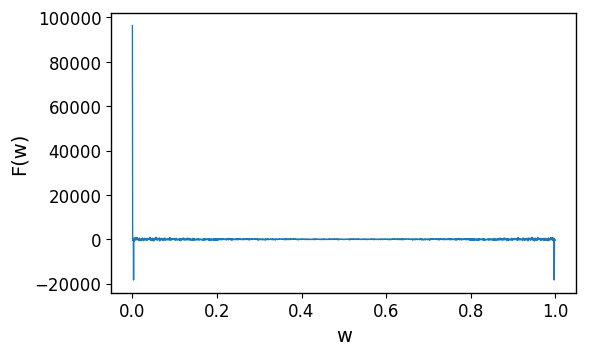

In [59]:
plt.plot(dx.w / (2 * np.pi), np.fft.fft(dx.Temperature).real)
plt.xlabel('w')
plt.ylabel('F(w)')

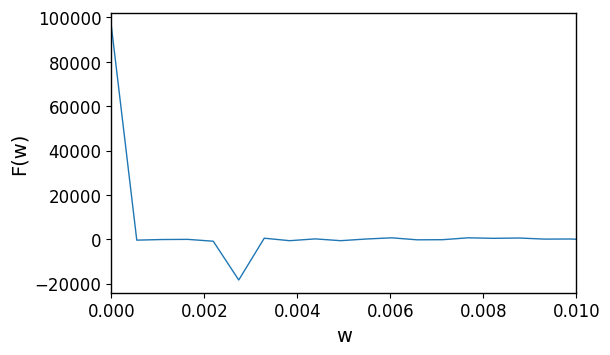

In [54]:
plt.plot(dx.w / (2 * np.pi), np.fft.fft(dx.Temperature).real)
plt.xlim(0, 0.01)
plt.xlabel('w')
plt.ylabel('F(w)')

In [56]:
w = 0.00275
1/w

363.6363636363637

### Explicit calculation of the DFT

In [60]:
N = bos_wthr['Mean TemperatureF'].index.size
Xk = []
for k in range(0, N):
     summ = 0.0 + 0.0j
     for n in range(0, N):
          summ += bos_wthr['Mean TemperatureF'][n] * np.exp(-1j * 2.0 * np.pi * k * n / float(N))
     Xk.append(summ)

In [61]:
Ak = np.fft.fft(bos_wthr['Mean TemperatureF'])
np.allclose(Xk, Ak)

True

In [62]:
np.allclose(np.fft.ifft(Ak), bos_wthr['Mean TemperatureF'])

True